<a href="https://colab.research.google.com/github/animesh0mondal/FUTURE_DS_03/blob/main/Student_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data




In [ ]:
import pandas as pd
df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='latin1')
display(df.head())
df.info()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


## Data cleaning




In [ ]:
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [ ]:
columns_to_drop = ['SN', 'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the DataFrame after dropping columns
display(df.head())

# Display the information about the DataFrame after dropping columns to verify
df.info()

,Total Feedback Given,Total Configured,Questions,Average/ Percentage,Course Name,Basic Course
0,1,12,How much of the syllabus was covered in the cl...,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,1,12,How well did the teachers prepare for the clas...,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,1,12,How well were the teachers able to communicate?,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,1,12,The teachers approach to teaching can best be...,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,1,12,Fairness of the internal evaluation process by...,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Total Feedback Given  580 non-null    int64 
 1   Total Configured      580 non-null    int64 
 2   Questions             580 non-null    object
 3   Average/ Percentage   580 non-null    object
 4   Course Name           580 non-null    object
 5   Basic Course          580 non-null    object
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [ ]:
for col in ['Questions', 'Course Name ', 'Basic Course']:
    df[col] = df[col].str.lower().str.strip()

# Display the first few rows of the DataFrame after standardizing text data
display(df.head())

,Total Feedback Given,Total Configured,Questions,Average/ Percentage,Course Name,Basic Course
0,1,12,how much of the syllabus was covered in the cl...,3.00 / 60.00,fy b.voc food technology,b.voc food technology
1,1,12,how well did the teachers prepare for the clas...,5.00 / 100.00,fy b.voc food technology,b.voc food technology
2,1,12,how well were the teachers able to communicate?,5.00 / 100.00,fy b.voc food technology,b.voc food technology
3,1,12,the teachers approach to teaching can best be...,3.00 / 60.00,fy b.voc food technology,b.voc food technology
4,1,12,fairness of the internal evaluation process by...,4.00 / 80.00,fy b.voc food technology,b.voc food technology


In [ ]:
print(df.columns)

Index(['Total Feedback Given', 'Total Configured', 'Questions',
       'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'Questions' column
df['Sentiment'] = df['Questions'].apply(get_sentiment)

# Display the first few rows with the new 'Sentiment' column
display(df.head())

,Total Feedback Given,Total Configured,Questions,Average/ Percentage,Course Name,Basic Course,Sentiment
0,1,12,how much of the syllabus was covered in the cl...,3.00 / 60.00,fy b.voc food technology,b.voc food technology,Positive
1,1,12,how well did the teachers prepare for the clas...,5.00 / 100.00,fy b.voc food technology,b.voc food technology,Neutral
2,1,12,how well were the teachers able to communicate?,5.00 / 100.00,fy b.voc food technology,b.voc food technology,Positive
3,1,12,the teachers approach to teaching can best be...,3.00 / 60.00,fy b.voc food technology,b.voc food technology,Positive
4,1,12,fairness of the internal evaluation process by...,4.00 / 80.00,fy b.voc food technology,b.voc food technology,Neutral


## Sentiment Analysis

In [ ]:
# Analyze the distribution of sentiment
sentiment_counts = df['Sentiment'].value_counts()
display(sentiment_counts)

,count
Sentiment,
Neutral,319
Positive,203
Negative,58


## Bar plot of sentiment

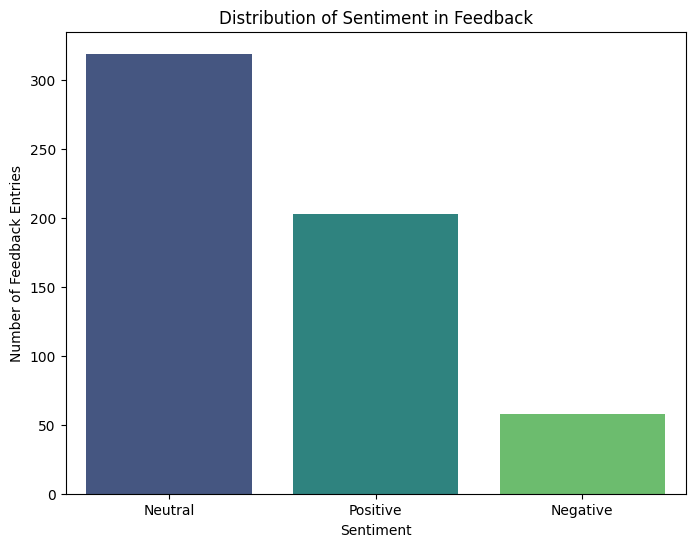

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar plot of sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', hue=sentiment_counts.index)
plt.title('Distribution of Sentiment in Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Feedback Entries')
plt.show()